# Data Exploration

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()
from utils import *
from sklearn.preprocessing import StandardScaler
from adaboost import *

In [2]:
os.chdir('/home/margarida/PycharmProjects/Machine_Learning_1')

df_bank = pd.read_csv('datasets/bank-marketing.csv')
df_bio = pd.read_csv('datasets/bio-response.csv')
df_blood = pd.read_csv('datasets/blood-transfusion-service-center.csv')
df_breast_cancer = pd.read_csv('datasets/breast-cancer.csv')
df_credit = pd.read_csv('datasets/credit-g.csv')
df_diabetes = pd.read_csv('datasets/diabetes.csv')
df_phishing = pd.read_csv('datasets/phishing-websites.csv')
df_transplant = pd.read_csv('datasets/transplant.csv')

In [3]:
def perform_eda(df, target_column=None):
    print("Basic Information:")
    print(df.info())
    print("\n")

    print("Statistical Summary:")
    print(df.describe(include='all'))
    print("\n")

    df.dropna()
    print("Data Types:")
    print(df.dtypes)
    print("\n")

    if target_column:
        print("Class Balance:")
        print(df[target_column].value_counts(normalize=True))
        print("\n")

        plt.figure(figsize=(8, 6))
        sns.countplot(data=df, x=target_column)
        plt.title("Class Distribution")
        plt.show()


In [4]:
def apply_pca_and_visualize(df, n_components=2):
    """
    Apply PCA on numeric features of the DataFrame and visualize the first two principal components.

    Args:
    df (DataFrame): The DataFrame to process.
    n_components (int, optional): Number of principal components to compute. Defaults to 2.

    Returns:
    DataFrame: DataFrame containing the principal components.
    """
    # Preprocess (selecting numeric features)
    features = df.select_dtypes(include=[np.number])

    # Standardizing the features
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features)

    # Applying PCA
    pca = PCA(n_components=n_components)  # Reduce to specified dimensions for visualization
    principal_components = pca.fit_transform(features_scaled)
    principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])

    # Visualizing the results
    plt.figure(figsize=(10,8))
    plt.scatter(principal_df['PC1'], principal_df['PC2'], alpha=0.5)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('PCA on Dataset')
    plt.grid(True)
    plt.show()
    
    return principal_df

### Bank Marketing

In [5]:
df_bank.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,Class
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'


In [6]:
df_bank.rename(columns={
    'V1': 'age',
    'V2': 'job',
    'V3': 'marital status',
    'V4': 'education',
    'V5': 'credit_default',
    'V6': 'balance',
    'V7': 'housing_loan',
    'V8': 'personal_loan',
    'V9': 'contact_type',
    'V10': 'day',
    'V11': 'month',
    'V12': 'duration_contact',
    'V13': 'campaign',
    'V14': 'pday',
    'V15': 'previous',
    'V16': 'poutcame',
    'Class': 'Target',
}, inplace=True)

In [7]:
df_bank.head()

,age,job,marital status,education,credit_default,balance,housing_loan,personal_loan,contact_type,day,month,duration_contact,campaign,pday,previous,poutcame,Target
0,58.0,b'management',b'married',b'tertiary',b'no',2143.0,b'yes',b'no',b'unknown',5.0,b'may',261.0,1.0,-1.0,0.0,b'unknown',b'1'
1,44.0,b'technician',b'single',b'secondary',b'no',29.0,b'yes',b'no',b'unknown',5.0,b'may',151.0,1.0,-1.0,0.0,b'unknown',b'1'
2,33.0,b'entrepreneur',b'married',b'secondary',b'no',2.0,b'yes',b'yes',b'unknown',5.0,b'may',76.0,1.0,-1.0,0.0,b'unknown',b'1'
3,47.0,b'blue-collar',b'married',b'unknown',b'no',1506.0,b'yes',b'no',b'unknown',5.0,b'may',92.0,1.0,-1.0,0.0,b'unknown',b'1'
4,33.0,b'unknown',b'single',b'unknown',b'no',1.0,b'no',b'no',b'unknown',5.0,b'may',198.0,1.0,-1.0,0.0,b'unknown',b'1'


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               45211 non-null  float64
 1   job               45211 non-null  object 
 2   marital status    45211 non-null  object 
 3   education         45211 non-null  object 
 4   credit_default    45211 non-null  object 
 5   balance           45211 non-null  float64
 6   housing_loan      45211 non-null  object 
 7   personal_loan     45211 non-null  object 
 8   contact_type      45211 non-null  object 
 9   day               45211 non-null  float64
 10  month             45211 non-null  object 
 11  duration_contact  45211 non-null  float64
 12  campaign          45211 non-null  float64
 13  pday              45211 non-null  float64
 14  previous          45211 non-null  float64
 15  poutcame          45211 non-null  object 
 16  Target            452

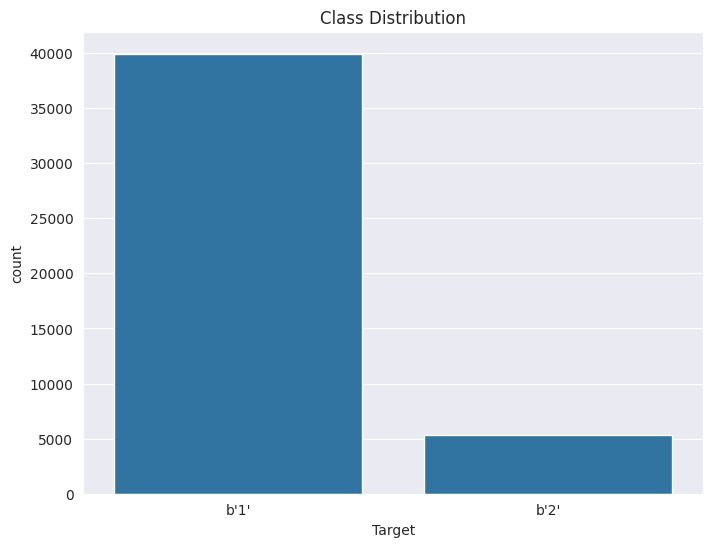

In [8]:
perform_eda(df_bank, 'Target')

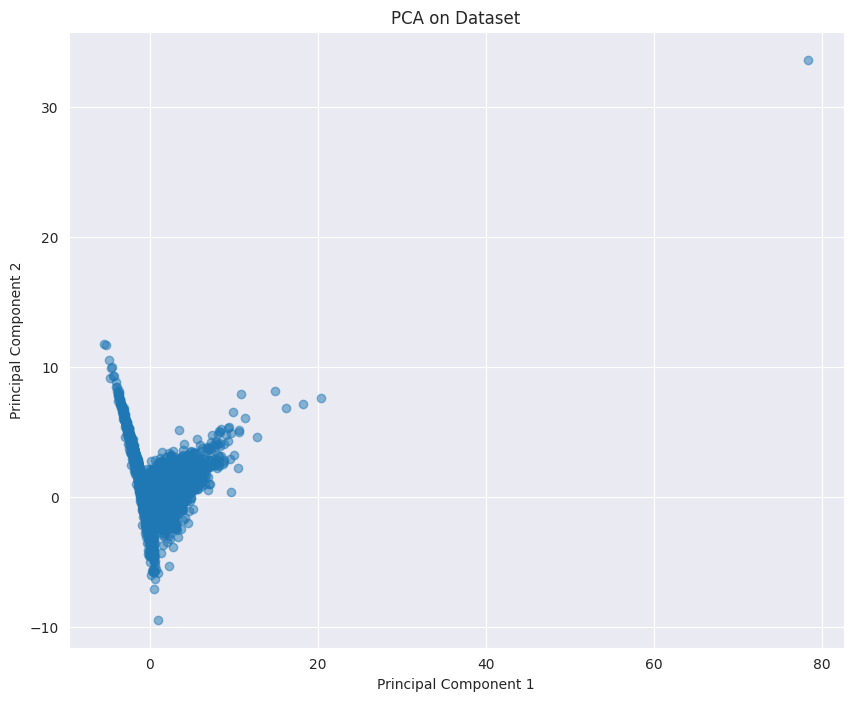

,PC1,PC2
0,0.033707,-1.402827
1,0.017589,-0.954478
2,0.022938,-0.699632
3,0.011669,-0.954774
4,0.051021,-0.912816
...,...,...
45206,-0.354970,-1.380807
45207,-0.425725,-0.933374
45208,1.585677,-0.955057
45209,-0.559210,-0.422836


In [9]:
apply_pca_and_visualize(df_bank)

### Bio Response

In [10]:
df_bio.head()

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776,target
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,b'1'
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'0'


For this dataset, since each feature represents a molecule, there is no point in changing the columns' names, as they are already in a suitable format. The target, represents if there was a biological response(1) or not(0).

In [11]:
df_bio.rename(columns={
    'target': 'Target'
}, inplace=True)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3751 entries, 0 to 3750
Columns: 1777 entries, D1 to Target
dtypes: float64(1776), object(1)
memory usage: 50.9+ MB
None


Statistical Summary:
                 D1           D2           D3           D4           D5  \
count   3751.000000  3751.000000  3751.000000  3751.000000  3751.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean       0.076948     0.592436     0.068142     0.038990     0.212112   
std        0.079989     0.105860     0.078414     0.115885     0.102592   
min        0.000000     0.282128     0.000000     0.000000     0.002630   
25%        0.033300     0.517811     0.000000     0.000000     0.138118   
50%        0.066700     0.585989     0.050000     0.000000     0.190926   
75%        0.100000     0.668395     

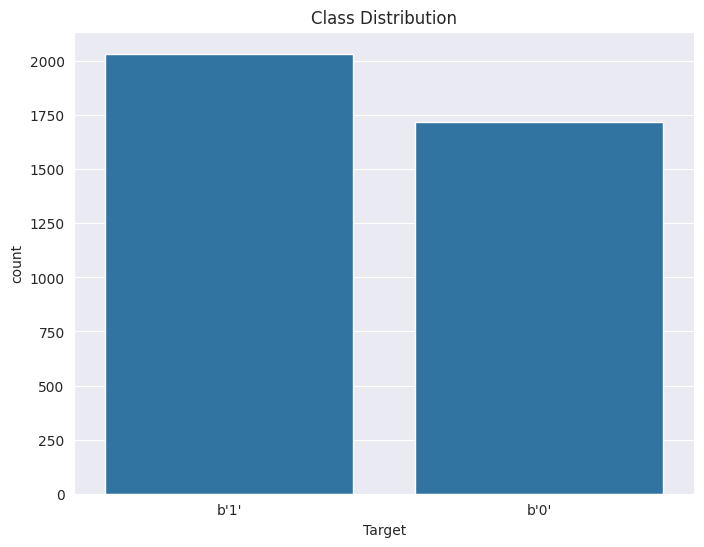

In [12]:
perform_eda(df_bio, 'Target')

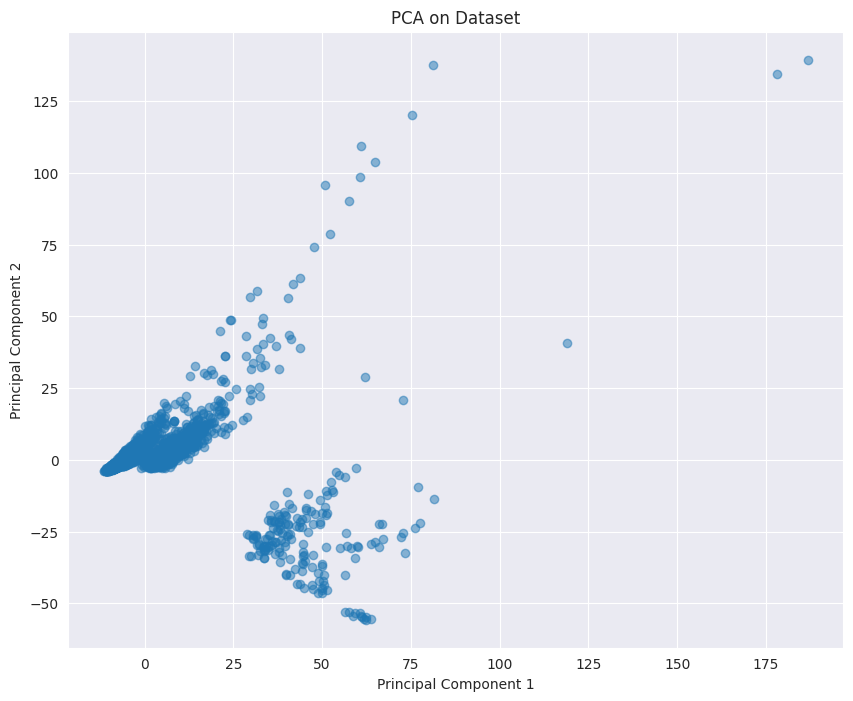

,PC1,PC2
0,-7.540673,-1.131017
1,58.038042,-30.858237
2,-8.447117,-2.594079
3,-9.706293,-3.210296
4,-8.355781,-2.120746
...,...,...
3746,-5.401564,-0.604249
3747,40.275004,-26.039317
3748,8.506133,4.693823
3749,-6.676270,0.234936


In [13]:
apply_pca_and_visualize(df_bio)

### Blood Transfusion Service Center

In [14]:
df_blood.head()

,V1,V2,V3,V4,Class
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'


The target in this dataset is the column that represents if the person donated(2) blood in March 2007 or not(1). To make the Target column more intuitive, we decided to change the value 2 to 1 and 1 to 0.

In [15]:
df_blood.rename(columns={
    'V1': 'recency',
    'V2': 'frequency',
    'V3': 'monetary',
    'V4': 'time',
    'Class': 'Target',
}, inplace=True)

df_blood['Target'] = df_blood['Target'].replace({2: 1, 1: 0})

In [16]:
df_blood.head()

,recency,frequency,monetary,time,Target
0,2.0,50.0,12500.0,98.0,b'2'
1,0.0,13.0,3250.0,28.0,b'2'
2,1.0,16.0,4000.0,35.0,b'2'
3,2.0,20.0,5000.0,45.0,b'2'
4,1.0,24.0,6000.0,77.0,b'1'


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   recency    748 non-null    float64
 1   frequency  748 non-null    float64
 2   monetary   748 non-null    float64
 3   time       748 non-null    float64
 4   Target     748 non-null    object 
dtypes: float64(4), object(1)
memory usage: 29.3+ KB
None


Statistical Summary:
           recency   frequency      monetary        time Target
count   748.000000  748.000000    748.000000  748.000000    748
unique         NaN         NaN           NaN         NaN      2
top            NaN         NaN           NaN         NaN   b'1'
freq           NaN         NaN           NaN         NaN    570
mean      9.506684    5.514706   1378.676471   34.282086    NaN
std       8.095396    5.839307   1459.826781   24.376714    NaN
min       0.000000    1.000000    250.000000    2.000000    NaN
25% 

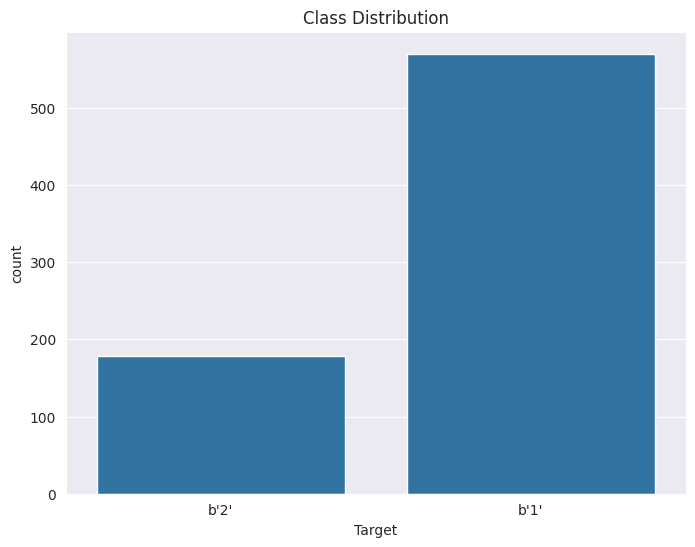

In [17]:
perform_eda(df_blood, 'Target')

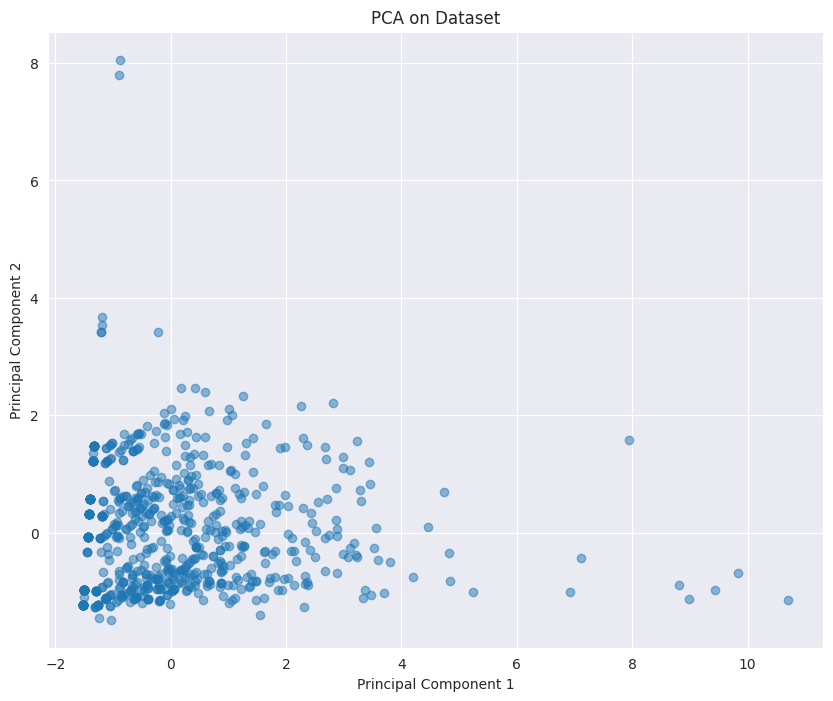

,PC1,PC2
0,10.698389,-1.143199
1,1.550642,-1.393216
2,2.309523,-1.257260
3,3.338733,-1.103198
4,4.837149,-0.828678
...,...,...
743,-0.816871,1.688058
744,-0.509881,1.682415
745,-0.120725,2.037178
746,-1.190991,3.543549


In [18]:
apply_pca_and_visualize(df_blood)

### Breast Cancer

In [19]:
df_breast_cancer.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,b'40-49',b'premeno',b'15-19',b'0-2',b'yes',b'3',b'right',b'left_up',b'no',b'recurrence-events'
1,b'50-59',b'ge40',b'15-19',b'0-2',b'no',b'1',b'right',b'central',b'no',b'no-recurrence-events'
2,b'50-59',b'ge40',b'35-39',b'0-2',b'no',b'2',b'left',b'left_low',b'no',b'recurrence-events'
3,b'40-49',b'premeno',b'35-39',b'0-2',b'yes',b'3',b'right',b'left_low',b'yes',b'no-recurrence-events'
4,b'40-49',b'premeno',b'30-34',b'3-5',b'yes',b'2',b'left',b'right_up',b'no',b'recurrence-events'


In [20]:
df_breast_cancer.rename(columns={
    'Class': 'Target'
}, inplace=True)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   Target       286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB
None


Statistical Summary:
             age   menopause tumor-size inv-nodes node-caps deg-malig  \
count        286         286        286       286       286       286   
unique         6           3         11         7         3         3   
top     b'50-59'  b'premeno'   b'30-34'    b'0-2'     b'no'      b'2'   
freq          96      

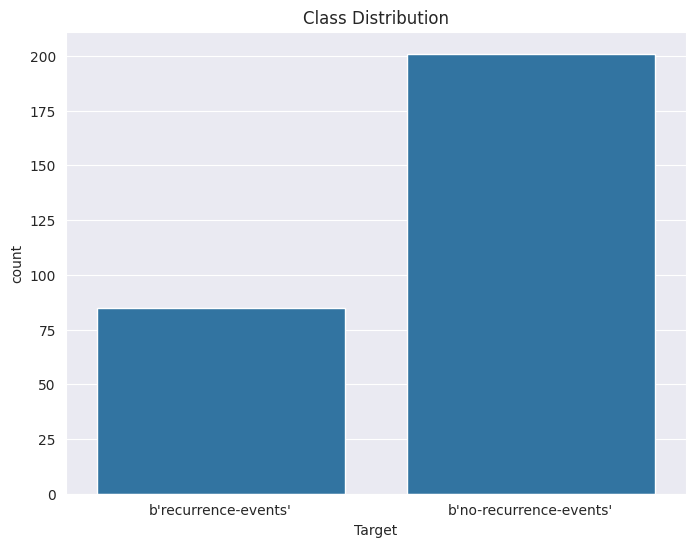

In [21]:
perform_eda(df_breast_cancer, 'Target')

### Credit G

In [22]:
df_credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


Aims to classify individuals as good or bad credit risks based on a set of attributes, using a cost matrix to emphasize the greater financial risk of misclassifying a bad credit risk as good.

In [23]:
df_credit.rename(columns={
    'class': 'Target',
}, inplace=True)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing               

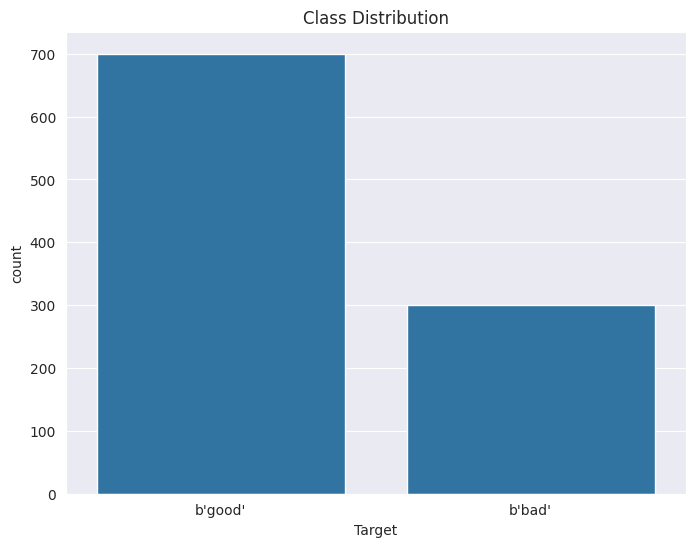

In [24]:
perform_eda(df_credit, 'Target')

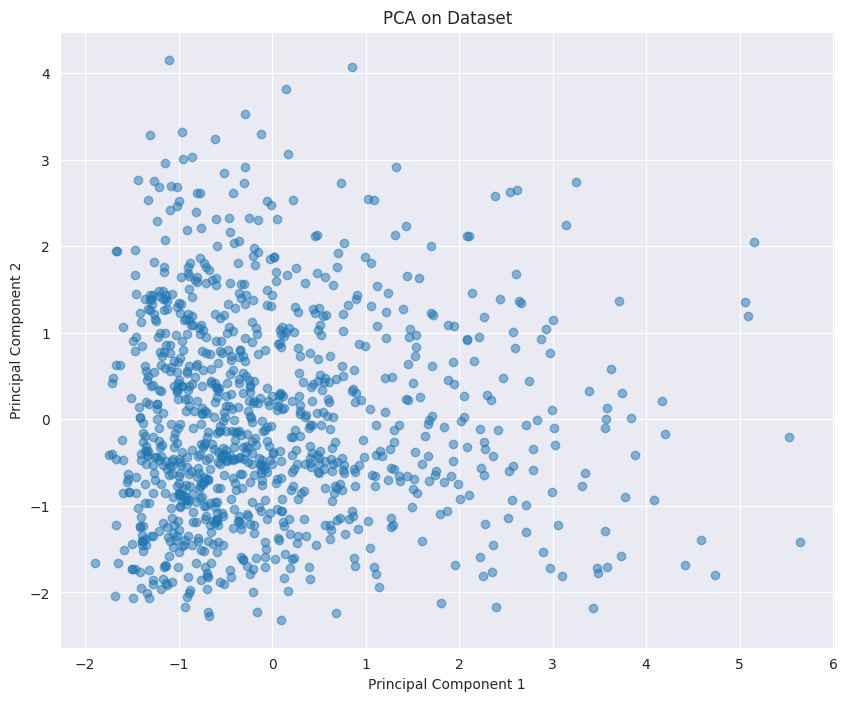

,PC1,PC2
0,-1.438189,2.763643
1,2.260842,-1.807829
2,-0.518687,1.208221
3,2.638944,1.363089
4,0.740745,2.735646
...,...,...
995,-0.851181,-0.095514
996,0.486612,0.439761
997,-1.274523,0.398868
998,0.771750,-0.529660


In [25]:
apply_pca_and_visualize(df_credit)

### Diabetes

In [26]:
df_diabetes.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


In [27]:
df_diabetes.rename(columns={
    'preg': 'n_pregnancy',
    'plas': 'plasma',
    'pres': 'diastolic_blood_pressure',
    'skin': 'skin_thickness',
    'insu': 'insulin',
    'mass': 'body_mass',
    'pedi': 'pedigree',
    'age': 'age',
    'class': 'Target',
}, inplace=True)

In [28]:
df_diabetes.head()

,n_pregnancy,plasma,diastolic_blood_pressure,skin_thickness,insulin,body_mass,pedigree,age,Target
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,b'tested_positive'
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,b'tested_negative'
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,b'tested_positive'
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,b'tested_negative'
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,b'tested_positive'


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   n_pregnancy               768 non-null    float64
 1   plasma                    768 non-null    float64
 2   diastolic_blood_pressure  768 non-null    float64
 3   skin_thickness            768 non-null    float64
 4   insulin                   768 non-null    float64
 5   body_mass                 768 non-null    float64
 6   pedigree                  768 non-null    float64
 7   age                       768 non-null    float64
 8   Target                    768 non-null    object 
dtypes: float64(8), object(1)
memory usage: 54.1+ KB
None


Statistical Summary:
        n_pregnancy      plasma  diastolic_blood_pressure  skin_thickness  \
count    768.000000  768.000000                768.000000      768.000000   
unique          NaN         NaN      

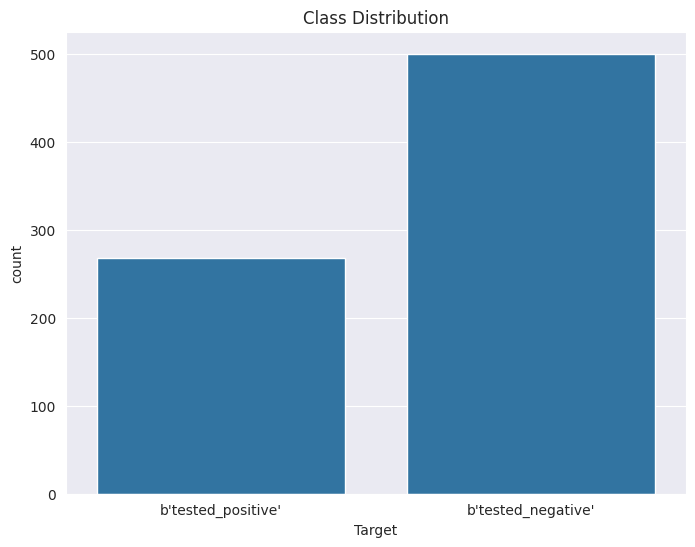

In [29]:
perform_eda(df_diabetes, 'Target')

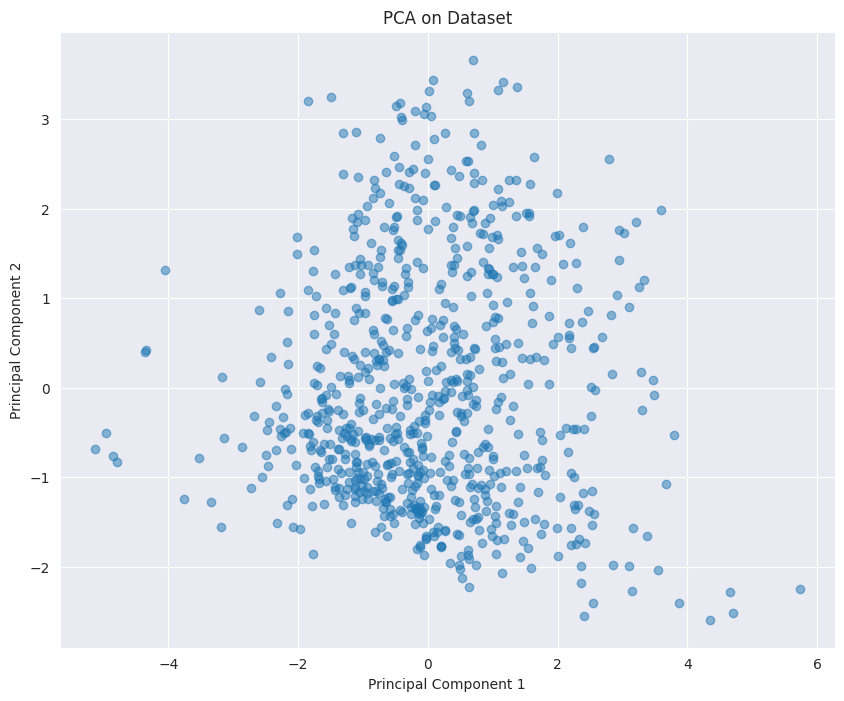

,PC1,PC2
0,1.068503,1.234895
1,-1.121683,-0.733852
2,-0.396477,1.595876
3,-1.115781,-1.271241
4,2.359334,-2.184819
...,...,...
763,1.562085,1.923150
764,-0.100405,-0.614181
765,-0.283475,0.097065
766,-1.060324,0.837062


In [30]:
apply_pca_and_visualize(df_diabetes)

### Phishing Websites

In [31]:
df_phishing.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,b'-1',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',b'1',b'-1',b'-1'
1,b'1',b'1',b'1',b'1',b'1',b'-1',b'0',b'1',b'-1',b'1',...,b'1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'-1'
2,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'-1',b'1',...,b'1',b'1',b'1',b'-1',b'1',b'-1',b'1',b'0',b'-1',b'-1'
3,b'1',b'0',b'1',b'1',b'1',b'-1',b'-1',b'-1',b'1',b'1',...,b'1',b'1',b'-1',b'-1',b'1',b'-1',b'1',b'-1',b'1',b'-1'
4,b'1',b'0',b'-1',b'1',b'1',b'-1',b'1',b'1',b'-1',b'1',...,b'-1',b'1',b'-1',b'-1',b'0',b'-1',b'1',b'1',b'1',b'1'


The target of this dataset is to classify websites as either phishing or legitimate based on a set of defined features.

In [32]:
df_phishing.rename(columns={
    'Result': 'Target',
}, inplace=True)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   having_IP_Address            11055 non-null  object
 1   URL_Length                   11055 non-null  object
 2   Shortining_Service           11055 non-null  object
 3   having_At_Symbol             11055 non-null  object
 4   double_slash_redirecting     11055 non-null  object
 5   Prefix_Suffix                11055 non-null  object
 6   having_Sub_Domain            11055 non-null  object
 7   SSLfinal_State               11055 non-null  object
 8   Domain_registeration_length  11055 non-null  object
 9   Favicon                      11055 non-null  object
 10  port                         11055 non-null  object
 11  HTTPS_token                  11055 non-null  object
 12  Request_URL                  11055 non-null  object
 13  URL_of_Ancho

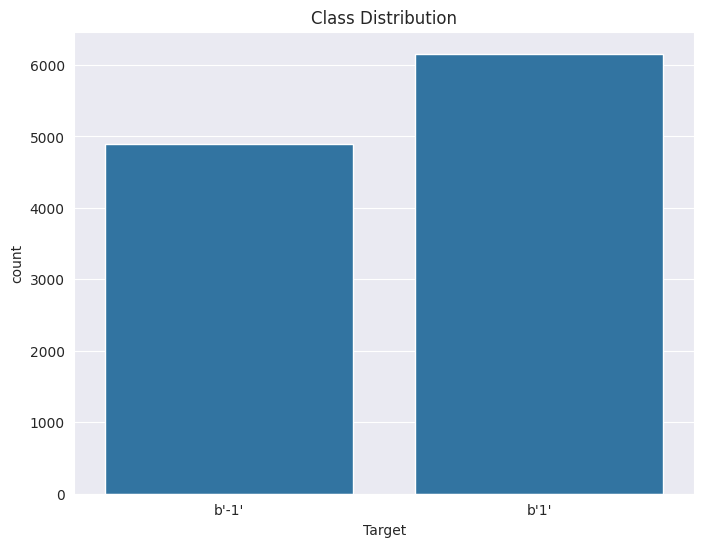

In [33]:
perform_eda(df_phishing, 'Target')

### Transplant

In [34]:
df_transplant.head()

,obs,e,z,binaryClass
0,1.0,0.057,0.0,b'P'
1,2.0,0.064,0.0,b'P'
2,3.0,0.064,0.0,b'P'
3,4.0,0.066,1.0,b'P'
4,5.0,0.462,0.0,b'P'


The dataset aims to investigate the factors influencing patient mortality within 30 days of heart transplant surgeries in 131 hospitals.

In [35]:
df_transplant.rename(columns={
    'obs': 'hospital',
    'e': 'expected_number_deaths',
    'z': 'number_deaths',
    'binaryClass': 'Target',
}, inplace=True)

In [36]:
df_transplant.head()

,hospital,expected_number_deaths,number_deaths,Target
0,1.0,0.057,0.0,b'P'
1,2.0,0.064,0.0,b'P'
2,3.0,0.064,0.0,b'P'
3,4.0,0.066,1.0,b'P'
4,5.0,0.462,0.0,b'P'


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hospital                131 non-null    float64
 1   expected_number_deaths  131 non-null    float64
 2   number_deaths           131 non-null    float64
 3   Target                  131 non-null    object 
dtypes: float64(3), object(1)
memory usage: 4.2+ KB
None


Statistical Summary:
          hospital  expected_number_deaths  number_deaths Target
count   131.000000              131.000000     131.000000    131
unique         NaN                     NaN            NaN      2
top            NaN                     NaN            NaN   b'P'
freq           NaN                     NaN            NaN     83
mean     66.000000                2.379099       2.381679    NaN
std      37.960506                2.387936       2.810579    NaN
min       1.000000      

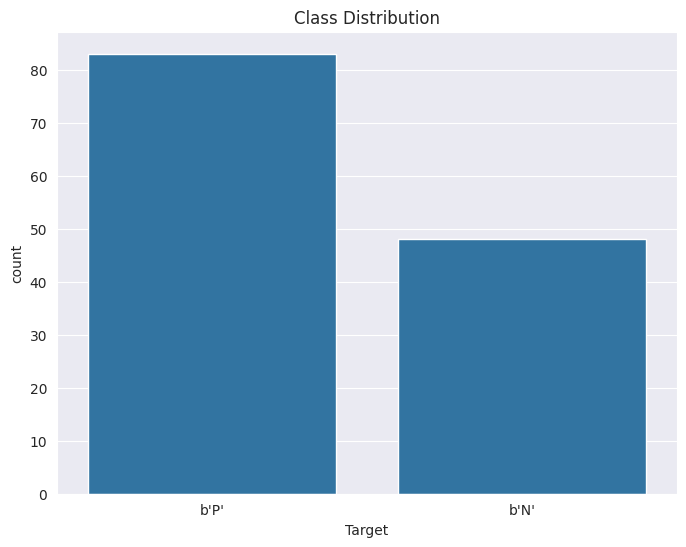

In [37]:
perform_eda(df_transplant, 'Target')

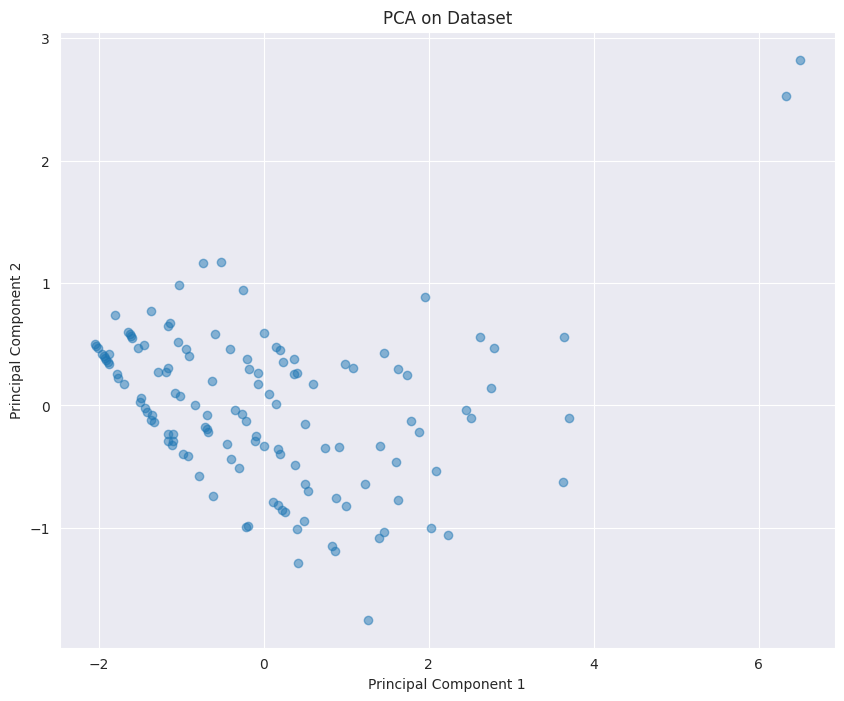

,PC1,PC2
0,-2.046035,0.504636
1,-2.029080,0.488151
2,-2.013927,0.472036
3,-1.803713,0.735400
4,-1.881170,0.418714
...,...,...
126,2.234627,-1.055117
127,3.635600,0.561282
128,3.704929,-0.105260
129,6.497702,2.822786


In [38]:
apply_pca_and_visualize(df_transplant)

In [39]:
datasets = [
    ('breast_cancer', df_breast_cancer),
    ('blood', df_blood),
    ('bank', df_bank),
    ('bio', df_bio),
    ('credit', df_credit),
    ('diabetes', df_diabetes),
    ('phishing', df_phishing),
    ('transplant', df_transplant)
]
adaboost = AdaBoost()
for dataset in datasets:
    label_encode_dataset(dataset[1])
    X = dataset[1].drop(columns=['Target'])
    y = dataset[1]['Target']

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

    # Fit AdaBoost model
    adaboost.fit(X_train, y_train, estimator='NaiveBayes')  # You can also use DecisionTree by passing estimator='DecisionTree'

    # Predict on test set
    y_pred = adaboost.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on {dataset[0]}: {accuracy}")

Accuracy on breast_cancer: 0.6896551724137931
Accuracy on blood: 0.5066666666666667
Accuracy on bank: 0.24283976556452505
Accuracy on bio: 0.6098535286284953
Accuracy on credit: 0.4
Accuracy on diabetes: 0.6753246753246753
Accuracy on phishing: 0.6056083220262325
Accuracy on transplant: 0.9629629629629629
